# 3rd Approach 

### Installing dependencies

In [1]:
! pip install plotly

In [2]:
! pip install nltk

In [3]:
! pip install stop-words

### SetUp

In [4]:
import plotly.express as px 
import nltk 
from nltk.corpus import stopwords

In [5]:
from wordcloud import WordCloud, STOPWORDS 

In [6]:
import pandas as pd 

In [7]:
from google.colab import drive 

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [10]:
from nltk.corpus import stopwords

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [12]:
import plotly.graph_objects as go

### Code

In [13]:
data = pd.read_excel('Toaster-reviews.xlsx')

In [14]:
data.columns

Index(['product', 'title', 'rating', 'data', 'body'], dtype='object')

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

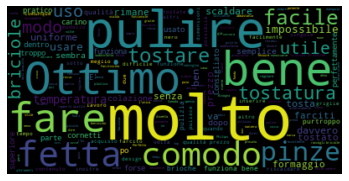

In [17]:
stop_words = stopwords.words('italian')

for parola in ["fette", "pane","tostapane","toast", "prodotto", "quindi", "c'è", "solo", "fa", "può"]:
  stop_words.append(parola)

textt = " ".join(review for review in data.body)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [18]:
data = data[data['rating'] != 3]
data['sentiment'] = data['rating'].apply(lambda rating : +1 if rating > 3 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# split df - positive and negative sentiment:
positive = data[data['sentiment'] == 1]
negative = data[data['sentiment'] == -1]

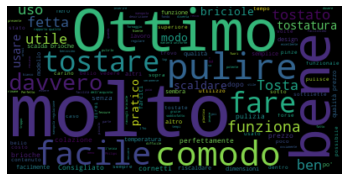

In [20]:
stopwords = stop_words
#stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.body)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

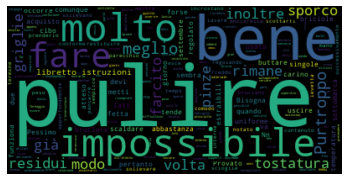

In [21]:
neg = " ".join(review for review in negative.body)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()